# PCA for visualization

In [26]:
import pandas as pd

# gene expression
nci60 = pd.read_csv('data/NCI60.txt',sep='\t', index_col=False)
# print(nci60.shape)
#display(nci60)
### pre-process
print(nci60.shape)
# expression data starts at column 5
expr = nci60.iloc[:,5:]
print(expr.shape)

(198, 389)
(198, 384)


[0.24630682 0.14342325 0.10134432]


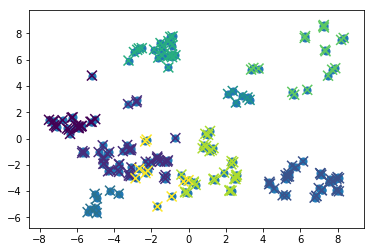

In [27]:
# create coordiates for NCI60 dataset
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



Kmean = KMeans(n_clusters=9)
Kmean.fit(expr)

pca = PCA(n_components=3)
pca.fit(expr) 
print(pca.explained_variance_ratio_) 
coord = pca.transform(expr)

plt.scatter(coord[ : , 1], coord[ : , 2], s = 50)

plt.scatter(coord[ : , 1], coord[ : , 2], s = 100, marker='x', c=Kmean.labels_)
plt.show()

# PCA for unsupervised continuous analysis

https://idyll.pub/post/dimensionality-reduction-293e465c2a3443e8941b016d/

install libraries

1. pip install wurlitzer
2. pip install Pillow


Comment out:

1. from umap import UMAP
2. from MulticoreTSNE import MulticoreTSNE

## Downloading data from the web


In [32]:
# scrape met website
import pandas as pd
import urllib.request as urllib2
import requests

test = pd.read_csv('dimensionality-reduction/data/met.csv')
namelink = test[['Object Number','Object ID']]
metalink = 'https://collectionapi.metmuseum.org/public/collection/v1/objects/'
dest_dir = 'data/met/images/'
#for i in range(len(namelink)):
for i in range(len(test)):
    # get the API metadate and retrieve the link for the actual image
    meta_id = namelink['Object ID'][i]
    response = urllib2.urlopen(metalink+str(meta_id))
    page_source = response.read().decode('utf-8')
    json_obj = json.loads(page_source)
    img_url = json_obj['primaryImage']
    # dowload the image
    print(meta_id,img_url)
    if img_url is not "":
        img_data = requests.get(img_url).content
        with open(dest_dir+str(meta_id)+'.jpg', 'wb') as handler:
            handler.write(img_data)
    #<meta property="og:image" content="https://collectionapi.metmuseum.org/api/collection/v1/iiif/200/33441/main-image" />
    
#static/images/met/

/anaconda3/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


200 https://images.metmuseum.org/CRDImages/ad/original/DT163.jpg
237 https://images.metmuseum.org/CRDImages/ad/original/DT179.jpg
364 https://images.metmuseum.org/CRDImages/ad/original/DP228047.jpg
674 https://images.metmuseum.org/CRDImages/ad/original/DT11610.jpg
802 https://images.metmuseum.org/CRDImages/ad/original/DP104414.jpg


KeyboardInterrupt: 

## Loading image data (takes long time to execute)

In [29]:
artworks = pd.read_csv('data/met/met.csv')
print(artworks.shape)
artworks.loc[0]

(1517, 43)


Object Number                                                        51.12.2
Is Highlight                                                            True
Is Public Domain                                                        True
Object ID                                                                200
Department                                          American Decorative Arts
Object Name                                                         Armchair
Title                                                  Spindle-back armchair
Culture                                                             American
Period                                                                   NaN
Dynasty                                                                  NaN
Reign                                                                    NaN
Portfolio                                                                NaN
Artist Role                                                              NaN

In [33]:
from os import path
from PIL import Image, ImageStat
import numpy as np
import pickle

X = []
w = []
h = []
l = []

for index, artwork in artworks.iterrows():
    #     print(artwork['Object ID'])
    nm = 'data/met/images/' + str(artwork['Object ID']) + '.jpg'
    if not path.exists(nm):
        continue
    im = Image.open(nm)
    w.append(im.size[0])
    h.append(im.size[1])
    im = im.resize((250, 250), Image.ANTIALIAS)
    sz = np.array(im).flatten().shape[0]
    if sz == 187500:
        l.append(artwork['Object ID'])
        X.append(np.expand_dims(np.array(im).flatten(),axis=0))
    #print(X[-1].shape)
# pickle.dump(X, open("met_pickle.pkl", "wb" ))
# pickle.dump(w, open("w.pkl", "wb" ))
# pickle.dump(h, open("h.pkl", "wb" ))
# pickle.dump(l, open("l.pkl", "wb" ))


## Start here (faster)

In [32]:
# read pickles
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd


X = pickle.load( open( "met_pickle.pkl", "rb" ) )
w = pickle.load( open( "w.pkl", "rb" ) )
h = pickle.load( open( "h.pkl", "rb" ) )
l = pickle.load( open( "l.pkl", "rb" ) )


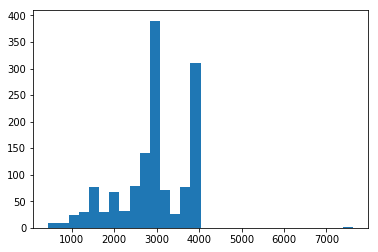

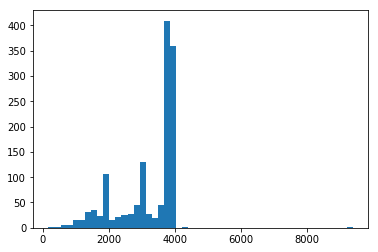

In [9]:

plt.hist(w, bins=30)
plt.show()

plt.hist(h, bins=50)
plt.show()

In [31]:
print(len(X), X[0].shape)
Xdata = np.vstack( X )
print(Xdata)
print(Xdata.shape)

# pd.DataFrame(Xdata).to_csv("met_data_orange2.csv", index=False)
# print("done")


1372 (1, 187500)
[[169 169 165 ... 198 197 195]
 [166 166 166 ... 198 197 198]
 [156 156 154 ... 219 219 219]
 ...
 [145 144 141 ... 149 145 143]
 [184 174 168 ... 182 177 173]
 [191 176 162 ... 184 177 174]]
(1372, 187500)
done


## Running PCA to arrange by brightness

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xdata)
print(np.sum(pca.explained_variance_ratio_), '% variance captured')
print(X_pca.shape)

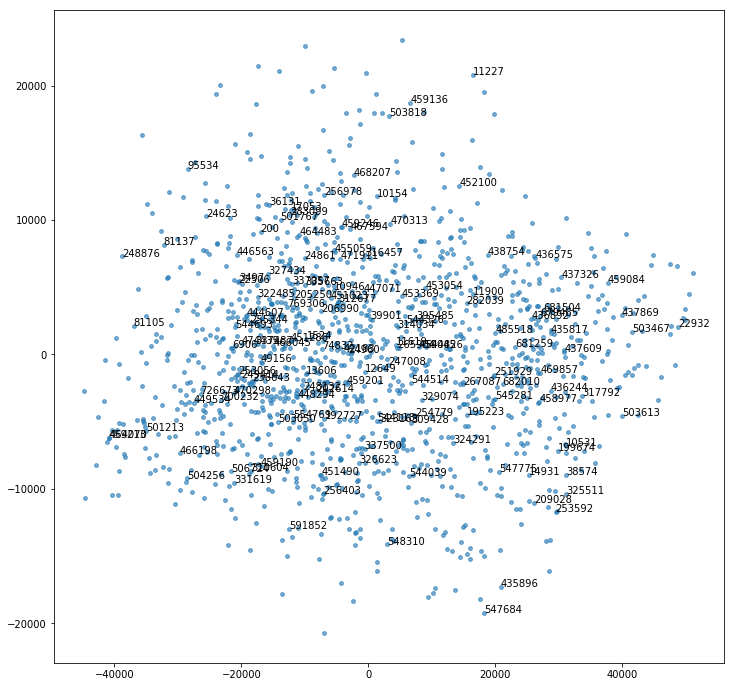

In [14]:
plt.figure(figsize=((12,12)))
plt.scatter(x=X_pca[:,0], y=X_pca[:,1], alpha=0.6, s=15)
for i, txt in enumerate(l):
    if i % 10 == 0:
        plt.annotate(txt, (X_pca[i,0], X_pca[i,1]))
plt.show()

# t-SNE for visualization 

https://mlexplained.com/2018/09/14/paper-dissected-visualizing-data-using-t-sne-explained/

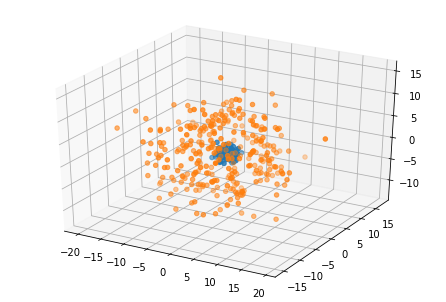

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import importlib
# importlib.import_module('mpl_toolkits').__path__

A = np.random.normal(scale=1, size=(100,3))
B = np.array([x for x in np.random.normal(scale=5, size=(500,3)) if np.linalg.norm(x) > 7])

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(A[:, 0],A[:, 1],A[:, 2])
ax.scatter(B[:, 0],B[:, 1],B[:, 2])

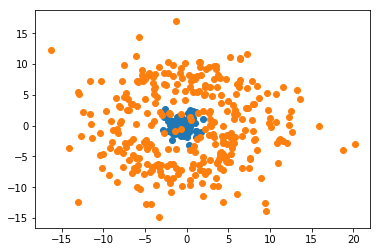

In [18]:
from sklearn.decomposition import PCA

X = np.r_[A,B]
X2 = PCA(n_components=2).fit_transform(X)

A2 = X2[:A.shape[0], :]
B2 = X2[A.shape[0]:, :]

plt.scatter(A2[:,0], A2[:, 1])
plt.scatter(B2[:,0], B2[:, 1])

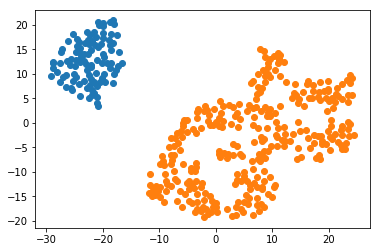

In [24]:
from sklearn.manifold import TSNE

X3 = TSNE(n_components=2).fit_transform(X)

A3 = X3[:A.shape[0], :]
B3 = X3[A.shape[0]:, :]

plt.scatter(A3[:,0], A3[:, 1])
plt.scatter(B3[:,0], B3[:, 1])



### on your own

1. Execute above code multiple times (get different clustering, but still fairly similar)

2. Add hypterparameter perplexity=1 (or 400)

We can see that in the case of perplexity 1, all the points are scattered with no structure. This makes sense, since setting perplexity to 1 essentially means you only look at one neighbor, which makes it difficult to find local structure. Perplexity 400, on the other hand, clusters all the points into one blob. This is because perplexity 400, in this case, means all the points are your neighbors.

# Lab 3 - Dimensionality reduction on nci60

<b> Data: </b> use nci60.csv

<b> Optinal: </b> Add hierarchical clustering

![alt text](Lab3_pca.png "Workflow")
